# Import & Comfiguration

In [1]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.tensorboard import SummaryWriter
from torchvision.transforms import ToTensor, Lambda, Compose
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import warnings
# select multiline -> 'ctrl + /' -> multiline comment
# print option
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)
# Control Warning Message
warnings.filterwarnings(action='ignore')
writer = SummaryWriter('runs')

# Preparing Data

In [2]:
dataset_dir = '~/project/practice/basic/datset'
transforms = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])
train_data = datasets.MNIST(root=dataset_dir, train=True, download=True, transform=transforms)
test_data = datasets.MNIST(root=dataset_dir, train=False, download=True, transform=transforms)
train_data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /home/jungeun/project/practice/basic/datset/MNIST/raw/train-images-idx3-ubyte.gz to /home/jungeun/project/practice/basic/datset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /home/jungeun/project/practice/basic/datset/MNIST/raw/train-labels-idx1-ubyte.gz to /home/jungeun/project/practice/basic/datset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /home/jungeun/project/practice/basic/datset/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/jungeun/project/practice/basic/datset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /home/jungeun/project/practice/basic/datset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/jungeun/project/practice/basic/datset/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/jungeun/project/practice/basic/datset
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [3]:
print('[Print] Type of trainData :', type(train_data))
print('[Print] Type of trainData.data :', type(train_data.data))
print('[Print] Type of trainData.targets :', type(train_data.targets))
print('[Print] Type of trainData.classes :',type(train_data.classes))

[Print] Type of trainData : torchvision.datasets.mnist.MNIST
[Print] Type of trainData.data : <class 'torch.Tensor'>
[Print] Type of trainData.targets : <class 'torch.Tensor'>
[Print] Type of trainData.classes : <class 'list'>


In [4]:
print(train_data.targets)
print(train_data.classes)

tensor([5, 0, 4,  ..., 5, 6, 8])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [5]:
print(train_data.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [6]:
print(train_data.targets[0])

tensor(5)


In [7]:
# Difference between trainData and trainData.data
# Difference between trainData is nomalized value of trainData.data
torch.set_printoptions(precision=1, linewidth=50000, sci_mode=None)
print(train_data[0])
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 5)


In [8]:
# [0][0]: 3D-image data [0][1]: Label
print(f'Image: {train_data[0][0].size()}')
print(f'Label: {train_data[0][1]}')

Image: torch.Size([1, 32, 32])
Label: 5


In [9]:
# trainData is nomalized using /255
print(f'trainData.data: {train_data.data[0][24][4]}')
print(f'trainData.data/255: {train_data.data[0][24][4]/255}')
print(f'trainData: {train_data[0][0][0][24][4]}')

trainData.data: 136
trainData.data/255: 0.5333333611488342
trainData: 0.0


# Data Loader

In [10]:
train_dataset, valid_dataset = torch.utils.data.random_split(train_data, [50000, 10000])
print(f'trainDataset : {len(train_dataset)}')
print(f'validDataset : {len(valid_dataset)}')

batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size = batch_size)
valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for imgs, labs in train_dataloader :
    print("Shape of image [N, C, H, W] : ", imgs.shape)
    print("Shape of label              : ", labs.shape, labs.dtype)
    break

trainDataset : 50000
validDataset : 10000
Shape of image [N, C, H, W] :  torch.Size([64, 1, 32, 32])
Shape of label              :  torch.Size([64]) torch.int64


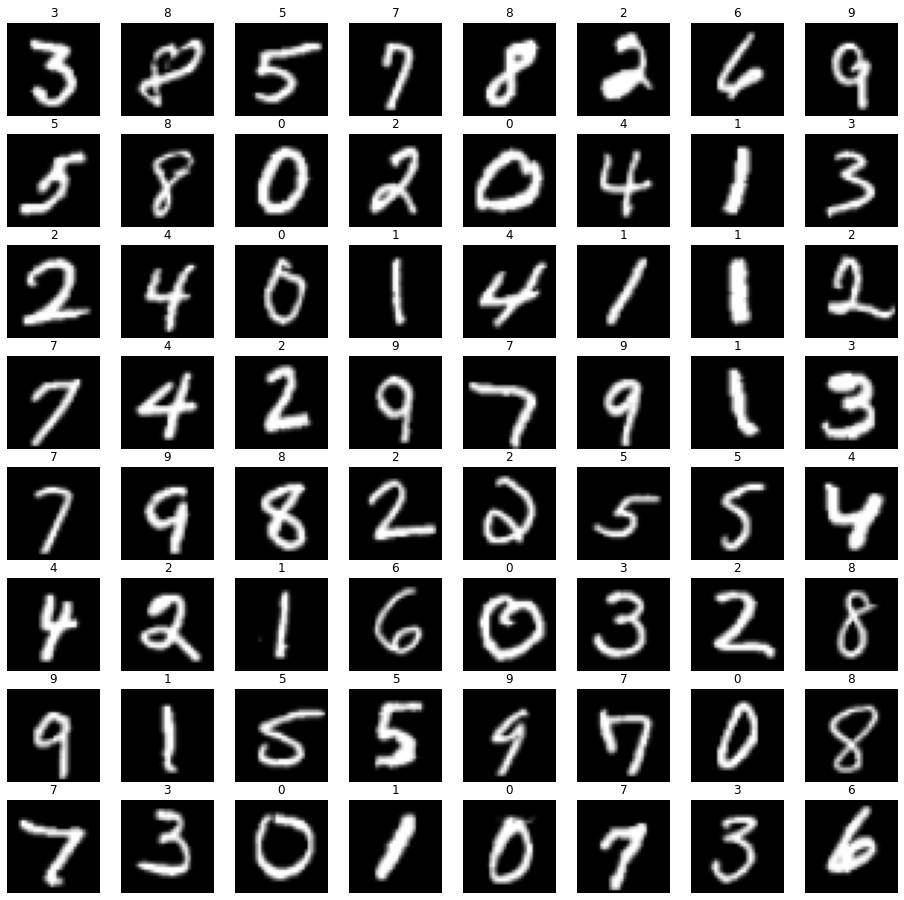

In [11]:
figure = plt.figure(figsize=(16, 16))
cols, rows = 8, 8
for i in range(cols * rows ):
	#sampleIndex = torch.randint(len(imgs), size=(1,)).item()
# 	img = imgs[sampleIndex]
# 	lab = labs[sampleIndex].item()

	img = imgs[i]
	lab = labs[i].item()
	figure.add_subplot(rows, cols, i+1)
	plt.title(lab)
	plt.axis("off")
	plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Model Build_up

In [12]:
device = "cuda" if torch.cuda.is_available () else "cpu"
print("Using {} device ". format(device))

Using cpu device 


In [13]:
class Lenet5(nn.Module):
    def __init__(self): #layer sequential define
        super(Lenet5, self).__init__()
        # 1 input image channel, 6 output channels, 5*5 square convolution
        
        self.feature = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, stride = 1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 5, stride = 1),
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x) :
        x = self.feature(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
model = Lenet5().to(device)
print(model)    
        

Lenet5(
  (feature): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [14]:
for name, param in model.named_parameters(): 
	print(f'name:{name}') 
	print(type(param)) 
	print(f'param.shape:{param.shape}') 
	print(f'param.requries_grad:{param.requires_grad}') 
	print('=====')

name:feature.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([6, 1, 5, 5])
param.requries_grad:True
=====
name:feature.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([6])
param.requries_grad:True
=====
name:feature.3.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16, 6, 5, 5])
param.requries_grad:True
=====
name:feature.3.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16])
param.requries_grad:True
=====
name:feature.6.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([120, 16, 5, 5])
param.requries_grad:True
=====
name:feature.6.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([120])
param.requries_grad:True
=====
name:classifier.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([84, 120])
param.requries_grad:True
=====
name:classifier.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([84])
param.requries_grad:True
=====
n

# Define Loss Function & Optimizer

In [15]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_loss = 0
test_loss = 0

In [ ]:
def train(train_dataloader, model, loss_func, optimizer, epoch, train_loss):
    for batch_index, (img, lab) in enumerate(train_dataloader):
        img, lab = img.to(device), lab.to(device)
        pred = model(img)
        loss = loss_func(pred, lab)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    writer.add_scalar('trainLoss', train_loss/len(train_dataloader.dataset), epoch)
    trainLoss = 0
#return loss

In [17]:
def test(test_dataloader, model, epoch, test_loss):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for img, lab in test_dataloader : 
            img, lab = img.to(device), lab.to(device)
            pred = model(img)
            test_loss += loss_func(pred, lab).item()
            correct += (pred.argmax(1) == lab).type(torch.float).sum().item()
    test_loss /= len(test_dataloader.dataset)
    correct /= len(test_dataloader.dataset)
    print(f"Accuracy : {(100*correct):>0.1f}%, Avg loss : {test_loss:>8f}")
    writer.add_scalar('testLoss', test_loss, epoch)
    test_loss = 0

In [18]:
model.state_dict().keys()

odict_keys(['feature.0.weight', 'feature.0.bias', 'feature.3.weight', 'feature.3.bias', 'feature.6.weight', 'feature.6.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.2.weight', 'classifier.2.bias'])

In [19]:
print(model.state_dict()['feature.0.weight'][0][:8])
print(model.state_dict()['feature.3.weight'][0][:8])
print(model.state_dict()['feature.6.weight'][0][:8])
print(model.state_dict()['classifier.0.weight'][0][:8])
print(model.state_dict()['classifier.2.weight'][0][:8])

tensor([[[-0.1315,  0.1819, -0.1853, -0.1943,  0.1805],
         [-0.1868, -0.0937, -0.1936,  0.0906,  0.1520],
         [-0.0954, -0.0895, -0.0553,  0.1526, -0.0233],
         [ 0.1689, -0.0779,  0.0009,  0.0698, -0.1039],
         [ 0.0167, -0.1457, -0.0882, -0.1580,  0.1872]]])
tensor([[[ 0.0515, -0.0561,  0.0715,  0.0555,  0.0618],
         [-0.0034, -0.0127, -0.0414,  0.0536,  0.0633],
         [-0.0518, -0.0672, -0.0372,  0.0696,  0.0056],
         [-0.0794,  0.0116,  0.0667,  0.0079, -0.0702],
         [ 0.0304, -0.0779,  0.0579,  0.0161, -0.0794]],

        [[-0.0212,  0.0074, -0.0574, -0.0208,  0.0239],
         [-0.0377,  0.0591,  0.0805, -0.0336, -0.0282],
         [ 0.0353,  0.0560, -0.0219,  0.0104, -0.0536],
         [-0.0195,  0.0157,  0.0273, -0.0318,  0.0314],
         [ 0.0459,  0.0018, -0.0386, -0.0474, -0.0114]],

        [[ 0.0815, -0.0011,  0.0810, -0.0124, -0.0743],
         [-0.0115,  0.0616,  0.0250, -0.0342,  0.0536],
         [ 0.0771,  0.0212, -0.0520,  0.07

In [20]:
model.state_dict()['feature.0.weight'][0][0]=0.3
print(model.state_dict()['feature.0.weight'][0][:8])
print(model.state_dict()['feature.3.weight'][0][:8])
print(model.state_dict()['feature.6.weight'][0][:8])
print(model.state_dict()['classifier.0.weight'][0][:8])
print(model.state_dict()['classifier.2.weight'][0][:8])

tensor([[[0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000, 0.3000]]])
tensor([[[ 0.0515, -0.0561,  0.0715,  0.0555,  0.0618],
         [-0.0034, -0.0127, -0.0414,  0.0536,  0.0633],
         [-0.0518, -0.0672, -0.0372,  0.0696,  0.0056],
         [-0.0794,  0.0116,  0.0667,  0.0079, -0.0702],
         [ 0.0304, -0.0779,  0.0579,  0.0161, -0.0794]],

        [[-0.0212,  0.0074, -0.0574, -0.0208,  0.0239],
         [-0.0377,  0.0591,  0.0805, -0.0336, -0.0282],
         [ 0.0353,  0.0560, -0.0219,  0.0104, -0.0536],
         [-0.0195,  0.0157,  0.0273, -0.0318,  0.0314],
         [ 0.0459,  0.0018, -0.0386, -0.0474, -0.0114]],

        [[ 0.0815, -0.0011,  0.0810, -0.0124, -0.0743],
         [-0.0115,  0.0616,  0.0250, -0.0342,  0.0536],
         [ 0.0771,  0.0212, -0.0520,  0.0798, -0.0584],
         [-

In [21]:
epochs = 10
for epoch in range(epochs):
	print(f"Epoch {epoch+1:3d}: ", end='')
	train(train_dataloader, model, loss_func, optimizer, epoch, train_loss)
	test(valid_dataloader, model, epoch, test_loss)
print("Done!")
writer.close()

Epoch   1: Accuracy : 75.6%, Avg loss : 0.014163
Epoch   2: Accuracy : 86.4%, Avg loss : 0.007699
Epoch   3: Accuracy : 89.1%, Avg loss : 0.005969
Epoch   4: Accuracy : 90.5%, Avg loss : 0.005062
Epoch   5: Accuracy : 91.7%, Avg loss : 0.004395
Epoch   6: Accuracy : 92.8%, Avg loss : 0.003855
Epoch   7: Accuracy : 93.5%, Avg loss : 0.003412
Epoch   8: Accuracy : 94.1%, Avg loss : 0.003052
Epoch   9: Accuracy : 94.7%, Avg loss : 0.002758
Epoch  10: Accuracy : 95.2%, Avg loss : 0.002515
Done!


# Check updated weight in the 1st layer

In [22]:
torch.save(model.state_dict(), "model.pth")

In [23]:
print(model.state_dict()['feature.0.weight'][0][:8])
print(model.state_dict()['feature.3.weight'][0][:8])
print(model.state_dict()['feature.6.weight'][0][:8])

tensor([[[0.2594, 0.2639, 0.2528, 0.2767, 0.3376],
         [0.3290, 0.3278, 0.3085, 0.3204, 0.3575],
         [0.3298, 0.3414, 0.3285, 0.3233, 0.3126],
         [0.3131, 0.3353, 0.3298, 0.3058, 0.2491],
         [0.3371, 0.3707, 0.3632, 0.2996, 0.1812]]])
tensor([[[ 0.1018,  0.0292,  0.1529,  0.1200,  0.1571],
         [ 0.0350,  0.0671,  0.0403,  0.1207,  0.1433],
         [-0.1251, -0.1163, -0.0823,  0.0296,  0.0073],
         [-0.1721, -0.0855, -0.0553, -0.1124, -0.1343],
         [ 0.0035, -0.1426, -0.0580, -0.1191, -0.1843]],

        [[-0.0200, -0.0053, -0.0858, -0.0601, -0.0334],
         [-0.0396,  0.0271,  0.0289, -0.0913, -0.0919],
         [ 0.0866,  0.0926,  0.0077,  0.0265, -0.0641],
         [ 0.0789,  0.1178,  0.1347,  0.0532,  0.0701],
         [ 0.0904,  0.0562,  0.0381,  0.0286,  0.0414]],

        [[ 0.0442, -0.0612,  0.0204, -0.0640, -0.1490],
         [-0.0686, -0.0161, -0.0501, -0.0961, -0.0199],
         [ 0.0397, -0.0305, -0.1218,  0.0084, -0.1376],
         [-

In [24]:
model = Lenet5().to(device)

In [25]:
print(model.state_dict()['feature.0.weight'][0][:8])
print(model.state_dict()['feature.3.weight'][0][:8])
print(model.state_dict()['feature.6.weight'][0][:8])

tensor([[[-0.1875, -0.1909,  0.1151,  0.1546,  0.1787],
         [-0.0878,  0.1292,  0.1724, -0.1923, -0.0308],
         [ 0.1514, -0.0645, -0.1445, -0.1740, -0.1993],
         [-0.0883, -0.1527, -0.1400,  0.0635,  0.0659],
         [-0.1001, -0.1784, -0.1211,  0.0929, -0.0800]]])
tensor([[[-0.0014, -0.0422, -0.0274,  0.0458,  0.0728],
         [-0.0721,  0.0627, -0.0526, -0.0788, -0.0628],
         [-0.0685,  0.0140,  0.0775,  0.0041, -0.0639],
         [ 0.0545,  0.0642,  0.0382, -0.0476, -0.0098],
         [-0.0242, -0.0608,  0.0170, -0.0332,  0.0646]],

        [[ 0.0080,  0.0776, -0.0118,  0.0635,  0.0589],
         [-0.0212,  0.0431,  0.0279, -0.0044,  0.0559],
         [-0.0510, -0.0111,  0.0321,  0.0083,  0.0732],
         [ 0.0453, -0.0451,  0.0104, -0.0359,  0.0146],
         [-0.0374, -0.0124, -0.0752,  0.0165, -0.0075]],

        [[ 0.0024,  0.0577, -0.0031, -0.0196,  0.0756],
         [ 0.0138,  0.0659,  0.0095, -0.0308, -0.0100],
         [-0.0651, -0.0114, -0.0588,  0.02

In [26]:
model.load_state_dict(torch.load("model.pth"))
print(model.state_dict()['feature.0.weight'][0][:8])
print(model.state_dict()['feature.3.weight'][0][:8])
print(model.state_dict()['feature.6.weight'][0][:8])

tensor([[[0.2594, 0.2639, 0.2528, 0.2767, 0.3376],
         [0.3290, 0.3278, 0.3085, 0.3204, 0.3575],
         [0.3298, 0.3414, 0.3285, 0.3233, 0.3126],
         [0.3131, 0.3353, 0.3298, 0.3058, 0.2491],
         [0.3371, 0.3707, 0.3632, 0.2996, 0.1812]]])
tensor([[[ 0.1018,  0.0292,  0.1529,  0.1200,  0.1571],
         [ 0.0350,  0.0671,  0.0403,  0.1207,  0.1433],
         [-0.1251, -0.1163, -0.0823,  0.0296,  0.0073],
         [-0.1721, -0.0855, -0.0553, -0.1124, -0.1343],
         [ 0.0035, -0.1426, -0.0580, -0.1191, -0.1843]],

        [[-0.0200, -0.0053, -0.0858, -0.0601, -0.0334],
         [-0.0396,  0.0271,  0.0289, -0.0913, -0.0919],
         [ 0.0866,  0.0926,  0.0077,  0.0265, -0.0641],
         [ 0.0789,  0.1178,  0.1347,  0.0532,  0.0701],
         [ 0.0904,  0.0562,  0.0381,  0.0286,  0.0414]],

        [[ 0.0442, -0.0612,  0.0204, -0.0640, -0.1490],
         [-0.0686, -0.0161, -0.0501, -0.0961, -0.0199],
         [ 0.0397, -0.0305, -0.1218,  0.0084, -0.1376],
         [-

In [27]:
torch.flatten(model.state_dict()['feature.0.weight']).to('cpu').numpy()

array([ 0.2593534 ,  0.26393333,  0.25275585,  0.2767318 ,  0.33761117,
        0.32896006,  0.32775435,  0.30853388,  0.32039014,  0.35753953,
        0.32975236,  0.34138066,  0.32845107,  0.32334718,  0.3126056 ,
        0.31307644,  0.33528313,  0.32979244,  0.30583924,  0.249146  ,
        0.3370563 ,  0.37067395,  0.3632152 ,  0.29962555,  0.18124038,
       -0.06869139,  0.00051313,  0.03573342,  0.15479273, -0.15646689,
       -0.08309694, -0.14053795, -0.30893964, -0.08954022, -0.10645829,
       -0.20592755, -0.25634566, -0.00834504, -0.09628852, -0.2489368 ,
       -0.23922098, -0.22712371, -0.12014231, -0.05220029, -0.19281332,
       -0.18316534,  0.14743954,  0.06724714,  0.11891957,  0.06498148,
       -0.08118684,  0.15083443, -0.11833554, -0.07193155, -0.3298868 ,
        0.12582621, -0.12796985,  0.04787514, -0.26012048, -0.24440207,
        0.26122642,  0.00789632,  0.00233911, -0.3208634 , -0.345925  ,
        0.03014603,  0.19202182,  0.03660348,  0.00648219, -0.17